In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train_p = pd.read_csv('../data/train.csv')
train = np.array(train_p)
Y = train[:, train.shape[1]-1]
X = train[:,:80]

In [84]:
pd.qcut(train_p['SalePrice'], q=4)[0]

Interval(163000.0, 214000.0, closed='right')

In [ ]:
plt.plot( train_p['GrLivArea'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('General Living Area', fontsize=13)
plt.show()

In [ ]:
plt.plot( train_p['GarageArea'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Garage Area', fontsize=13)
plt.show()

In [ ]:
plt.plot( train_p['YearBuilt'], train_p['SalePrice'], 'o')
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Year Built', fontsize=13)
plt.show()

In [ ]:
#correlation matrix
corrmat = train_p.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
sns.distplot(np.log1p(train_p['SalePrice']))


In [ ]:
sns.distplot(np.log1p(train_p['SalePrice']));

In [ ]:
all_data_na = (train_p.isnull().sum() / len(train_p)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Feature', fontsize=17)
plt.ylabel('% Missing instances', fontsize=17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001900CCB35C8>,
      dtype=object)

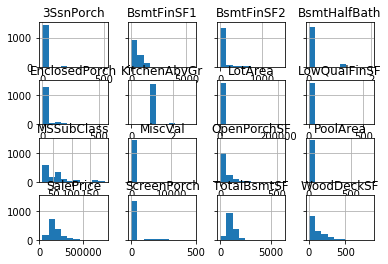

In [63]:
# skewed features show
from scipy.stats import skew 
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
skew_features = train_p.select_dtypes(numeric_dtypes).apply(
        lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]

train_p[high_skew.index[0:16]].hist(sharey=True)



C:\Users\yusuf\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\yusuf\Anaconda3\lib\site-packages\scipy\stats\stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001900CCB3208>,
      dtype=object)

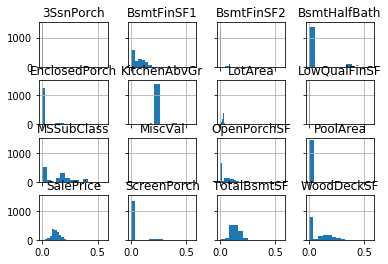

In [64]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

skew_index = high_skew.index
for i in skew_index:
    train_p[i] = boxcox1p(train_p[i], boxcox_normmax(train_p[i] + 1))

normalized_numerics[high_skew.index[0:16]].hist(sharey=True, sharex=True)